In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.datasets import make_blobs

# Regression Models Lab
## Linear and logistic regression: theory and practice

In this lab you'll revisit and expand on your knowledge of modelling in general, as well as the fundamentals of linear and logistic regression. As a reminder, _linear regression_ is a regression model (regressor), and _logistic regression_ is a classification model (classifier).

This time, you'll use generated data, in order to separate some of the complexity of handling various datasets from inspecting and evaluating models.

**Use vectorization as much as possible!** You should be able to complete the lab using for-loops only to track the training steps.

### Problem 1. Generate some data for multiple linear regression (1 point)
As an expansion to the lecture, you'll create a dataset and a model.

Create a dataset of some (e.g., 50-500) observations of several (e.g., 5-20) independent features. You can use random generators for them; think about what distributions you'd like to use. Let's call them $x_1, x_2, ..., x_m$. The data matrix $X$ you should get should be of size $n \times m$. It's best if all features have different ranges.

Create the dependent variable by assigning coefficients $\bar{a_1}, \bar{a_2}, ..., \bar{a_m}, \bar{b}$ and calculating $y$ as a linear combination of the input features. Add some random noise to the functional values. I've used bars over coefficients to avoid confusion with the model parameters later.

Save the dataset ($X$ and $y$), and "forget" that the coefficients have ever existed. "All" you have is the file and the implicit assumption that there is a linear relationship between $X$ and $y$.

### This code is commented out because I don't want to generate a new dataset

In [180]:
# n_samples = 300
# n_features = 10
# 
# X = np.column_stack([
#     np.random.normal(-10, 10, n_samples),
#     np.random.binomial(10, 0.10, n_samples),
#     np.random.exponential(1, n_samples),
#     np.random.normal(50, 5, n_samples),
#     np.random.normal(-10, 10, n_samples),
#     np.random.normal(-2, 20, n_samples),
#     np.random.beta(2, 5, n_samples),
#     np.random.poisson(5, n_samples),
#     np.random.gamma(2, 2, n_samples),
#     np.random.binomial(10, 0.3, n_samples),
# ])
# 
# true_coefficients = np.random.uniform(-5, 5, n_features)
# noise = np.random.normal(0, 1, n_samples)
# y = X @ true_coefficients + noise
# 
# data = pd.DataFrame(X, columns=[f"x{i+1}" for i in range(X.shape[1])])
# data["y"] = y

# data

In [181]:
# data.to_csv("dataset", index=False)

In [182]:
# data = pd.read_csv('dataset')
# data

### Working with Linear Regression model

In [183]:
data = pd.read_csv('dataset')
X = data.drop('y', axis=1)
y = data['y']

In [184]:
# Build and fit the model
model = LinearRegression()
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [185]:
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)
print("Coef:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 0.9630812152849224
R² Score: 0.9998291782739616
Coef: [ 3.94297155  1.15180149 -1.45042261 -3.67009844 -1.17764792  2.58565281
  2.45285652  1.24963462 -0.36625256  4.18027121]
Intercept: -0.15496987103438187


### Problem 2. Check your assumption (1 point)
Read the dataset you just saved (this is just to simulate starting a new project). It's a good idea to test and verify our assumptions. Find a way to check whether there really is a linear relationship between the features and output.

In [186]:
data = pd.read_csv('dataset')
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-12.533793,0.0,0.884781,48.949745,-4.967740,-3.673782,0.336590,7.0,6.344657,1.0,-221.395053
1,-15.410608,1.0,0.095378,45.086177,-10.782383,-9.695614,0.466436,8.0,0.968744,4.0,-209.991613
2,-13.340002,1.0,2.959240,53.154066,0.999701,-16.623833,0.120613,8.0,1.404134,1.0,-281.521308
3,-33.518992,2.0,0.418213,47.454779,-21.651386,-2.118195,0.765833,1.0,6.833676,3.0,-272.119525
4,-8.749993,0.0,0.546924,50.555175,6.612415,-3.665122,0.338059,4.0,7.562950,4.0,-218.183364
...,...,...,...,...,...,...,...,...,...,...,...
295,-22.679545,1.0,0.158739,47.945401,7.348251,15.126221,0.552741,6.0,3.371871,3.0,-213.959833
296,-18.673642,1.0,0.323400,51.021933,2.843862,-2.726062,0.540619,8.0,3.302818,4.0,-246.351413
297,-4.566535,1.0,0.558407,52.526150,-8.301214,-18.366745,0.143676,8.0,4.597046,3.0,-227.132042
298,-11.568482,1.0,0.488056,46.331553,-15.646884,1.573404,0.207097,8.0,4.903674,4.0,-168.395002


In [187]:
X = data.drop(columns='y')
y = data['y']

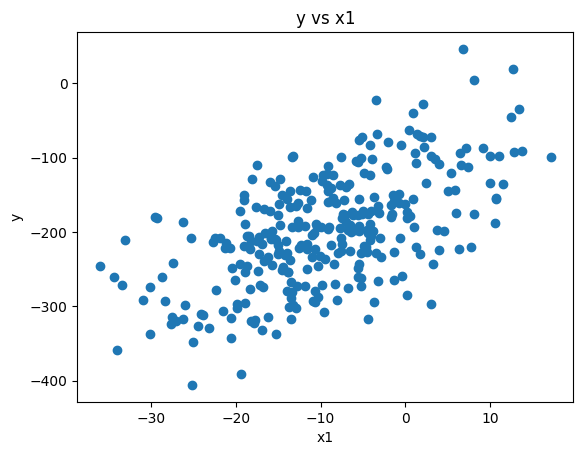

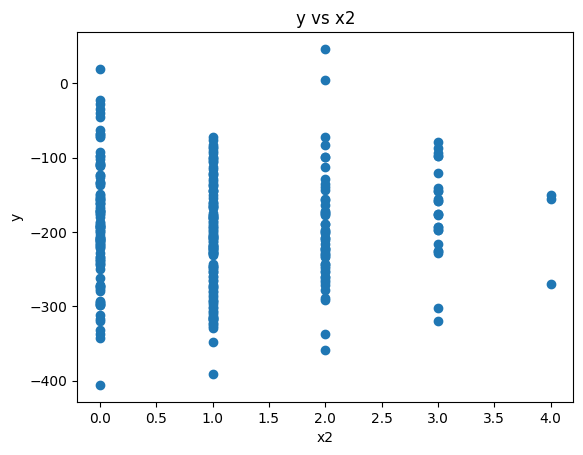

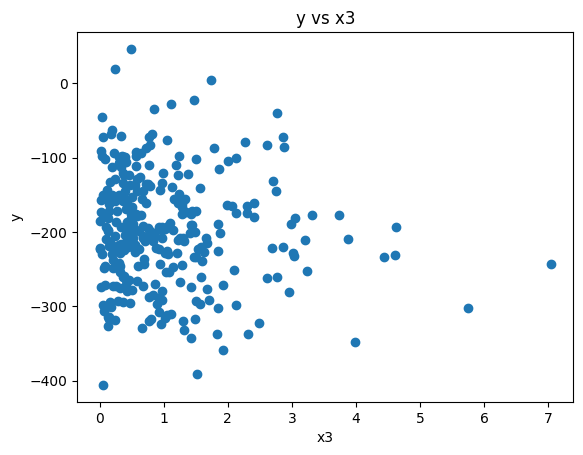

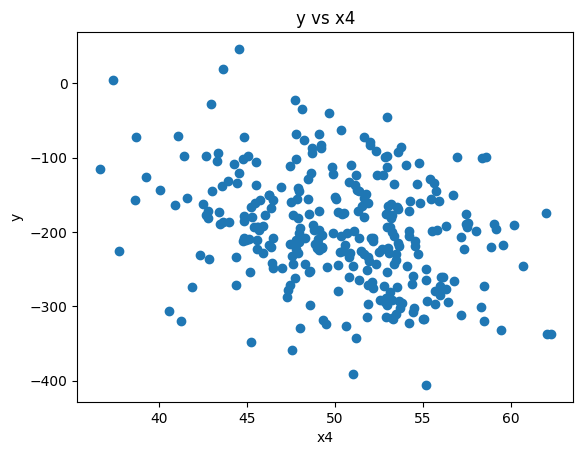

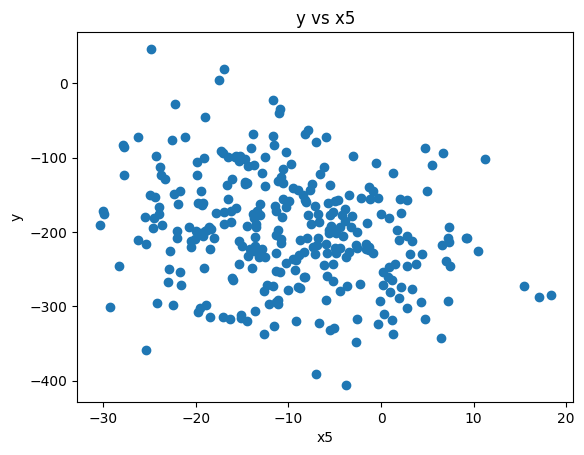

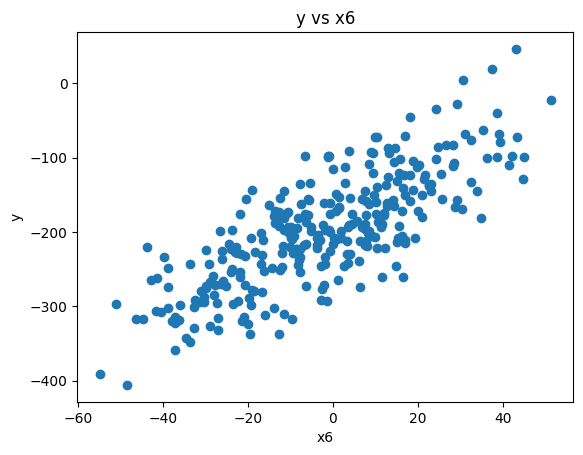

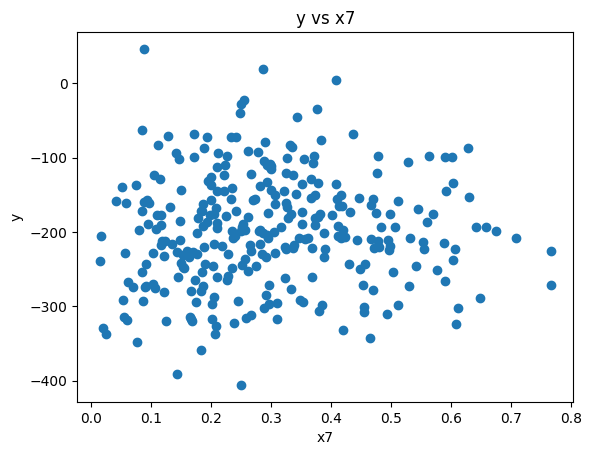

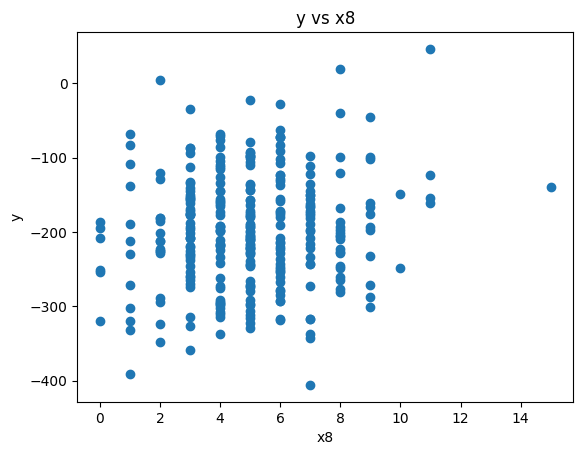

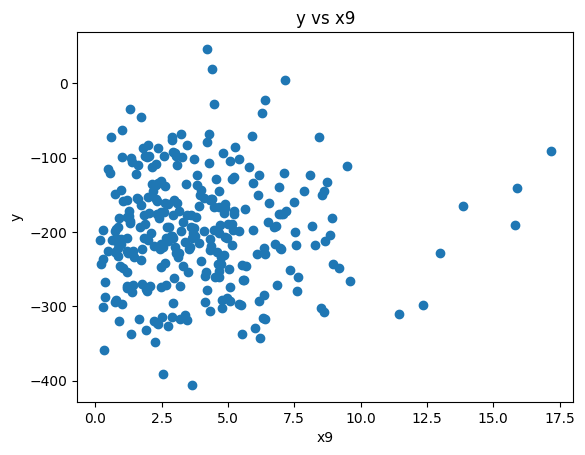

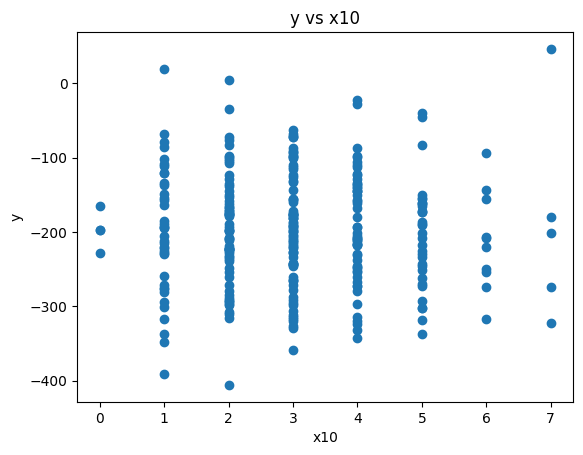

In [188]:
for column in X.columns:
    plt.scatter(X[column], y)
    plt.xlabel(column)
    plt.ylabel('y')
    plt.title(f'y vs {column}')
    plt.show()

In [189]:
#X1 has high correlation with y
#Only X1 has a linear relationship with y – no linear relationship is observed for the other features
correlations = X.corrwith(y)
print(correlations)

x1     0.593625
x2     0.014675
x3    -0.087771
x4    -0.301728
x5    -0.232258
x6     0.783165
x7     0.055269
x8     0.122852
x9     0.037436
x10   -0.015321
dtype: float64


### Problem 3. Figure out the modelling function (1 point)
The modelling function for linear regression is of the form
$$ \tilde{y} = \sum_{i=1}^{m}a_i x_i + b $$

If you want to be clever, you can find a way to represent $b$ in the same way as the other coefficients.

Write a Python function which accepts coefficients and data, and ensure (test) it works correctly.

In [190]:
data_p3 = pd.read_csv('dataset')
data_p3

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,-12.533793,0.0,0.884781,48.949745,-4.967740,-3.673782,0.336590,7.0,6.344657,1.0,-221.395053
1,-15.410608,1.0,0.095378,45.086177,-10.782383,-9.695614,0.466436,8.0,0.968744,4.0,-209.991613
2,-13.340002,1.0,2.959240,53.154066,0.999701,-16.623833,0.120613,8.0,1.404134,1.0,-281.521308
3,-33.518992,2.0,0.418213,47.454779,-21.651386,-2.118195,0.765833,1.0,6.833676,3.0,-272.119525
4,-8.749993,0.0,0.546924,50.555175,6.612415,-3.665122,0.338059,4.0,7.562950,4.0,-218.183364
...,...,...,...,...,...,...,...,...,...,...,...
295,-22.679545,1.0,0.158739,47.945401,7.348251,15.126221,0.552741,6.0,3.371871,3.0,-213.959833
296,-18.673642,1.0,0.323400,51.021933,2.843862,-2.726062,0.540619,8.0,3.302818,4.0,-246.351413
297,-4.566535,1.0,0.558407,52.526150,-8.301214,-18.366745,0.143676,8.0,4.597046,3.0,-227.132042
298,-11.568482,1.0,0.488056,46.331553,-15.646884,1.573404,0.207097,8.0,4.903674,4.0,-168.395002


In [191]:
X = data_p3.drop(columns=['y'])
y = data_p3['y']

In [192]:
model = LinearRegression()

# y_noisy = y + np.random.normal(loc=0, scale=1000, size=len(y))

model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [193]:
#[a] coefficient
print(model.coef_)

[ 3.94297155  1.15180149 -1.45042261 -3.67009844 -1.17764792  2.58565281
  2.45285652  1.24963462 -0.36625256  4.18027121]


In [194]:
#[b] coefficient
print(model.intercept_)

-0.15496987103438187


In [195]:
#Prediction for Y column
y_pred = model.predict(X)
y_pred

array([-222.72834713, -210.23998774, -281.1770504 , -271.5992262 ,
       -218.47662828, -131.25502808, -189.85248014,  -43.81037979,
       -275.08423216, -279.40130431, -208.24331164, -192.05263697,
        -75.59706404, -272.26806136, -271.93374614, -146.02436392,
       -235.85421466, -358.71978817, -222.56224802, -153.22455109,
       -393.45683735, -310.92639211, -197.89325518, -243.75189656,
       -158.28979487, -234.15629524, -228.88801089, -248.29261181,
       -151.57916799, -199.15956509, -172.25738458,  -97.00998569,
       -243.26817788, -194.23229017, -132.92585317, -219.6422648 ,
        -93.34313771, -240.3295261 ,  -86.7284553 , -157.11928185,
        -23.69155289, -270.40613384,  -99.81843378, -311.7448357 ,
       -110.48688759, -174.20136823, -191.05139543, -155.4247709 ,
       -178.48572126, -165.64835305, -108.73988548, -225.05805103,
       -145.94761848,  -26.41652935,  -94.68494675, -155.96271639,
       -244.85844228, -275.39502454, -137.77701997, -172.69106

In [196]:
#Evaluate the model
r2 = r2_score(y, y_pred)
r2

0.9998291782739616

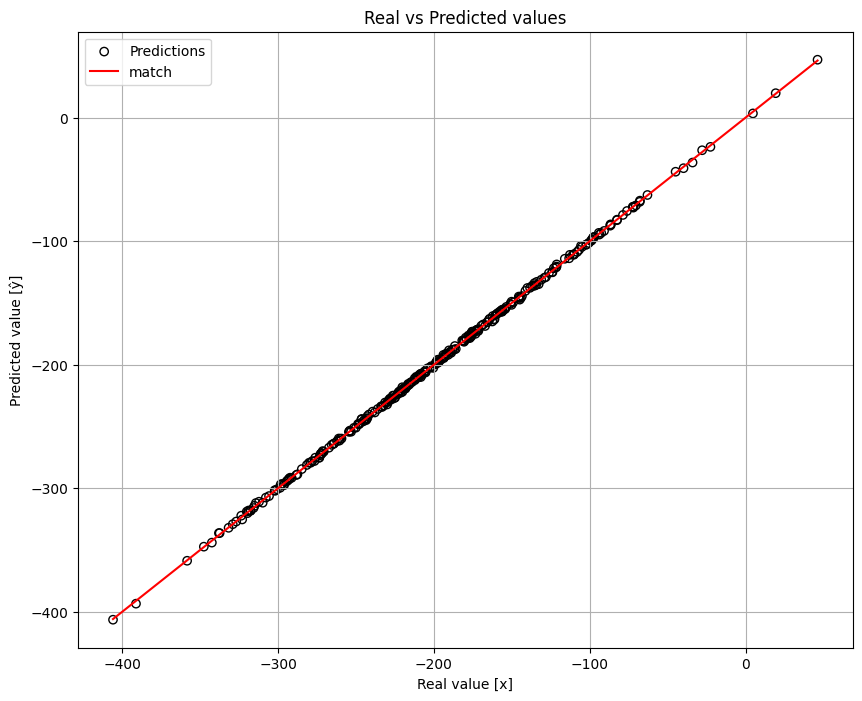

In [197]:
plt.figure(figsize=(10, 8))

plt.scatter(y, y_pred, color='none', edgecolors='black', label='Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', label='match')
plt.xlabel('Real value [x]')
plt.ylabel('Predicted value [ŷ]')
plt.title('Real vs Predicted values')
plt.legend()
plt.grid(True)
plt.show()

### Conclusions

###### When one or more features have a strong linear relationship with y (i.e., a high correlation coefficient), 
the model can learn from the data very well, resulting in highly accurate predictions.

### Problem 4. Write the cost function and compute its gradients (1 point)
Use MSE as the cost function $J$. Find a way to compute, calculate, or derive its gradients w.r.t. the model parameters $a_1, ..., a_m, b$

Note that computing the cost function value and its gradients are two separate operations. Quick reminder: use vectorization to compute all gradients (maybe with the exception of $\frac{\partial J}{\partial b}$) at the same time.

### Cost function with new example dataset

In [198]:
#Generate new dataset
# np.random.seed(42)
# x = np.random.uniform(0, 10, 100)
# noise = np.random.normal(0, 2, 100)
# y = 2.5 * x + 5 + noise

In [199]:
# data_cost = pd.DataFrame(
#     {
#         'x': x,
#         'y': y
#     }
# )

# data_cost.to_csv('data_cost.csv', index=False)

In [200]:
data_cost = pd.read_csv('data_cost.csv')
data_cost

,x,y
0,3.745401,14.537597
1,9.507143,28.169843
2,7.319939,23.483370
3,5.986585,15.991324
4,1.560186,8.461122
...,...,...
95,4.937956,15.713269
96,5.227328,17.914117
97,4.275410,16.370829
98,0.254191,6.188860


In [201]:
def display_cost_function(data_cost, a_guess, b_guess):
    x = data_cost.x
    y = data_cost.y
    
    model = a_guess * x + b_guess
    differences = y - model
    
    mse = np.mean(differences **2)
    
    return mse

mse = display_cost_function(data_cost, a_guess=3, b_guess=3)

In [202]:
def find_minimum_gradients(a_guess, b_guess, learning_rate, len_data_cost, steps):
    """
    Performs gradient descent to minimize MSE and returns optimal a and b.
    """
    for _ in range(steps):
        predictions = a_guess * data_cost.x + b_guess
        
        differences = data_cost.y - predictions
        a_gradient = -2 / len_data_cost * np.sum(data_cost.x * differences)
        b_gradient = -2 / len_data_cost * np.sum(differences)
        
        a_guess = a_guess - learning_rate * a_gradient
        b_guess = b_guess - learning_rate * b_gradient
    
    return [a_guess, b_guess]

In [203]:
def calculate_gradient(data, start_point_a, start_point_b, learning_rate, steps):
    x = data_cost.x
    y = data_cost.y 
    
    a_guess, b_guess = start_point_a, start_point_b
    len_data_cost = len(data)
    
    predictions = a_guess * x + b_guess
    diff = y - predictions
    
    gradients = find_minimum_gradients(start_point_a, start_point_b, learning_rate, len_data_cost, steps)
    
    x_column_len = len(data_cost.x)
    y_column_len = len(data_cost.y)
    
    a_gradient = -2 / x_column_len * np.sum(x * diff)
    b_gradient = -2 / y_column_len * np.sum(diff)
    
    return [gradients[0], gradients[1]]

In [204]:
def plot_the_model(gradients_a, gradient_b):
    x = data_cost.x
    model = gradients_a * x + gradient_b
    
    plt.figure(figsize=(10, 7))
    plt.scatter(data_cost.x, data_cost.y, label='Data')
    plt.plot(x, model, color='red', label=f"Model => {gradients_a:.2f}x + {gradient_b}")
    plt.title('Demo [Cost function]')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

### Problem 5. Perform gradient descent (1 point)
Perform weight updates iteratively. Find a useful criterion for stopping. For most cases, just using a fixed (large) number of steps is enough.

You'll need to set a starting point (think about which one should be good, and how it matters); and a learning rate.

In [205]:
perform_gradient_descent = calculate_gradient(
    data=data_cost, start_point_a=0, start_point_b=0, learning_rate=0.001, steps=1000
)
perform_gradient_descent

[np.float64(2.844284729545214), np.float64(2.5919086426844)]

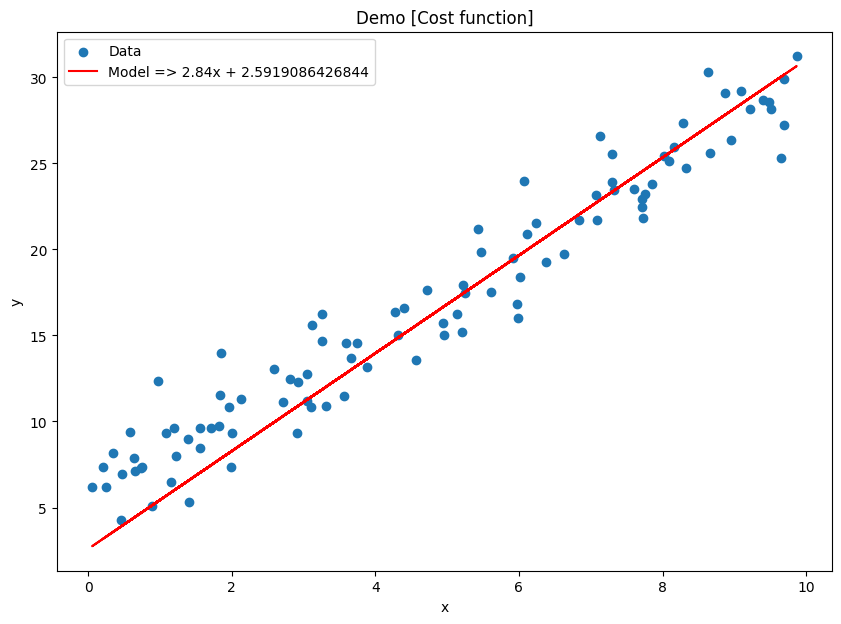

In [206]:
plot_the_model(perform_gradient_descent[0], perform_gradient_descent[1])

### Test the functionality with completed new dataset

In [207]:
# np.random.seed(42)
# x = np.random.uniform(0, 100, 100)
# noise = np.random.normal(0, 2, 100)
# y = 5.5 * x + 7 + noise

In [208]:
# test_functionality_dataset = pd.DataFrame(
#     {
#         'x': x,
#         'y': y
#     }
# )
# 
# data_cost.to_csv('test_functionality_dataset.csv', index=False)

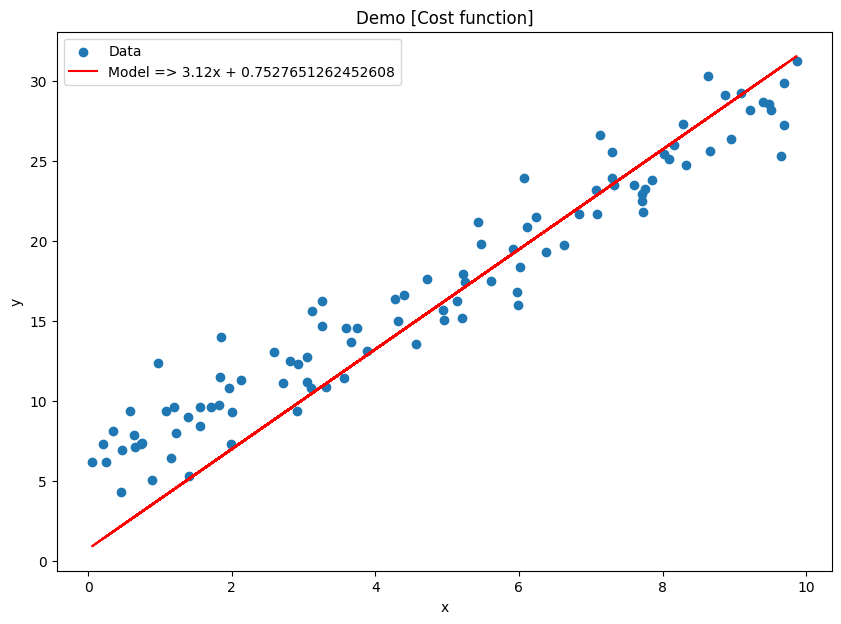

In [209]:
test_data = pd.read_csv('test_functionality_dataset.csv')
test_calculations = calculate_gradient(data=test_data, start_point_a=0, start_point_b=0, learning_rate=0.0001, steps=1000)
plot_the_model(test_calculations[0], test_calculations[1])

In [210]:
display_cost_function(data_cost=test_data, a_guess=test_calculations[0], b_guess=test_calculations[1])

np.float64(9.436144861934)

In [211]:
x_new = 12
model = test_calculations[0] * x_new + test_calculations[1]
y_pred = model
y_pred

np.float64(38.20748975305744)

### Problem 6. Do other cost functions work? (2 points)
Repeat the process in problems 4 and 5 with MAE, and then again - with the [Huber loss](https://en.wikipedia.org/wiki/Huber_loss). Both of them are less sensitive to outliers / anomalies than MSE); with the Huber loss function being specifically made for datasets with outliers.

Explain your findings. Is there a cost function that works much better? How about speed of training (measured in wall time)?

In [212]:
def display_cost_function_mae(data_cost, a_guess, b_guess):
    x = data_cost.x
    y = data_cost.y
    
    model = a_guess * x + b_guess
    differences = y - model
    mae = np.mean(np.abs(differences))
    
    return mae

mae = display_cost_function_mae(data_cost=test_data, a_guess=test_calculations[0], b_guess=test_calculations[1])
mae

np.float64(2.4423689659419345)

##### MAE is usually less than MSE because MSE squares the errors,
##### giving more weight to larger errors, while MAE treats all errors equally

In [213]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * (error ** 2)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

loss = huber_loss(y_true=test_data.y, y_pred=model, delta=1.0)
loss

np.float64(20.95513188893692)

### Problem 7. Experiment with the learning rate (1 point)
Use your favorite cost function. Run several "experiments" with different learning rates. Try really small, and really large values. Observe and document your findings.

C:\Users\sveto\OneDrive\Desktop\Data_Science_Upskill_Softuni\.venv\lib\site-packages\numpy\_core\_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\sveto\AppData\Local\Temp\ipykernel_24052\1143099165.py:12: RuntimeWarning: invalid value encountered in scalar subtract
  a_guess = a_guess - learning_rate * a_gradient


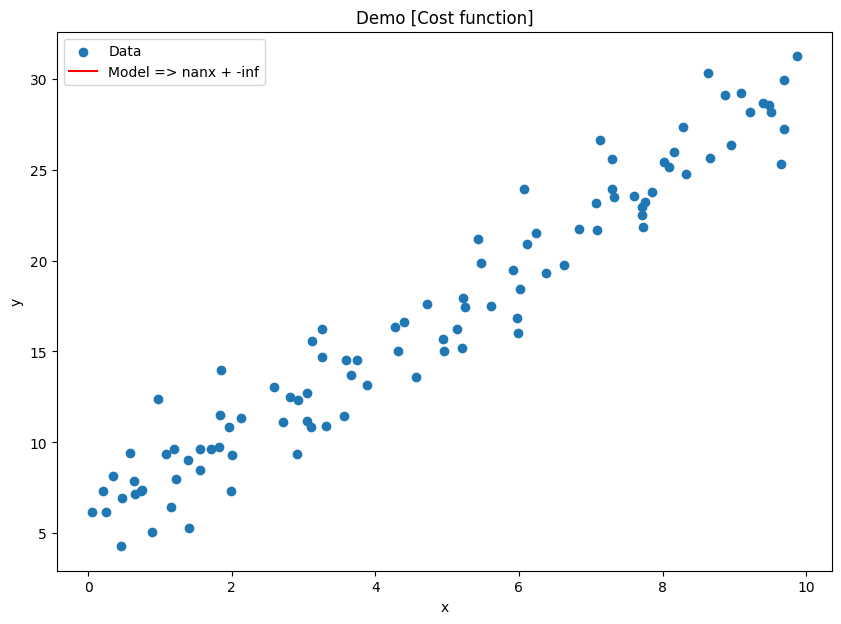

MAE Error: nan vs MSE Error: nan


In [214]:
test_calculations = calculate_gradient(data=test_data, start_point_a=0, start_point_b=0, learning_rate=0.1, steps=1000)
plot_the_model(test_calculations[0], test_calculations[1])
mae_error = display_cost_function_mae(data_cost, test_calculations[0], test_calculations[1])
mse_error = display_cost_function(data_cost, test_calculations[0], test_calculations[1])
print(f"MAE Error: {mae_error} vs MSE Error: {mse_error}")

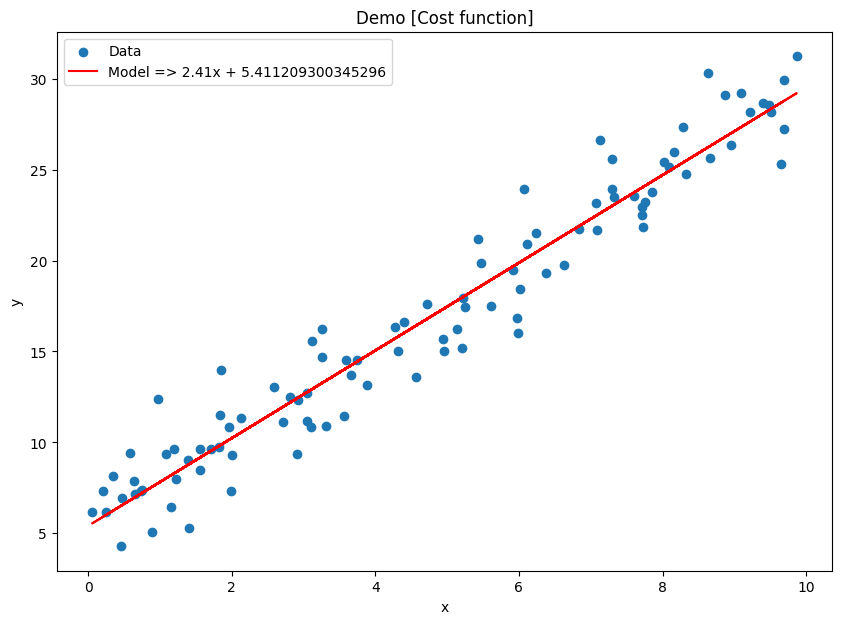

MAE Error: 1.4032382459069352 vs MSE Error: 3.226440557671101


In [215]:
test_calculations = calculate_gradient(data=test_data, start_point_a=0, start_point_b=0, learning_rate=0.01, steps=1000)
plot_the_model(test_calculations[0], test_calculations[1])
mae_error = display_cost_function_mae(data_cost, test_calculations[0], test_calculations[1])
mse_error = display_cost_function(data_cost, test_calculations[0], test_calculations[1])
print(f"MAE Error: {mae_error} vs MSE Error: {mse_error}")

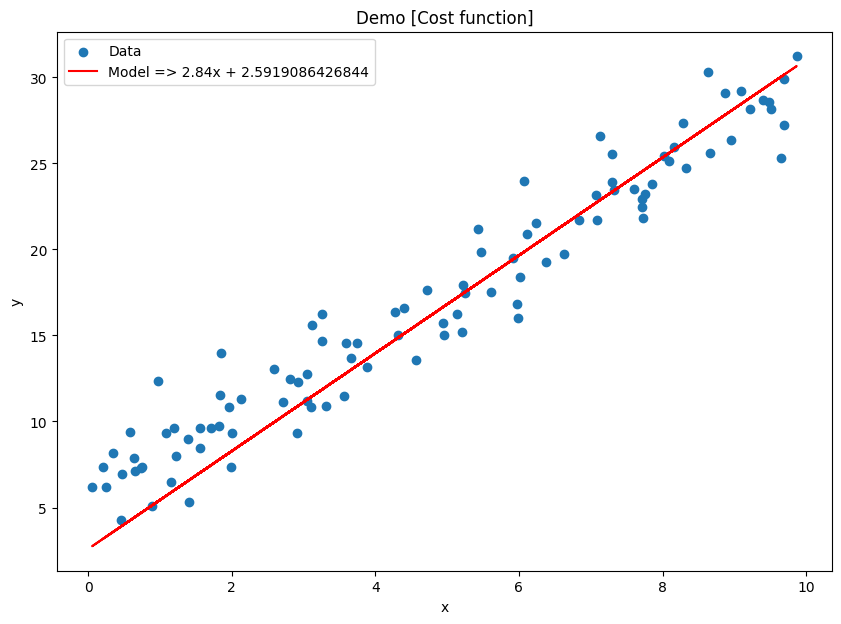

MAE Error: 1.8816115244570404 vs MSE Error: 5.513329568512058


In [216]:
test_calculations = calculate_gradient(data=test_data, start_point_a=0, start_point_b=0, learning_rate=0.001, steps=1000)
plot_the_model(test_calculations[0], test_calculations[1])
mae_error = display_cost_function_mae(data_cost, test_calculations[0], test_calculations[1])
mse_error = display_cost_function(data_cost, test_calculations[0], test_calculations[1])
print(f"MAE Error: {mae_error} vs MSE Error: {mse_error}")

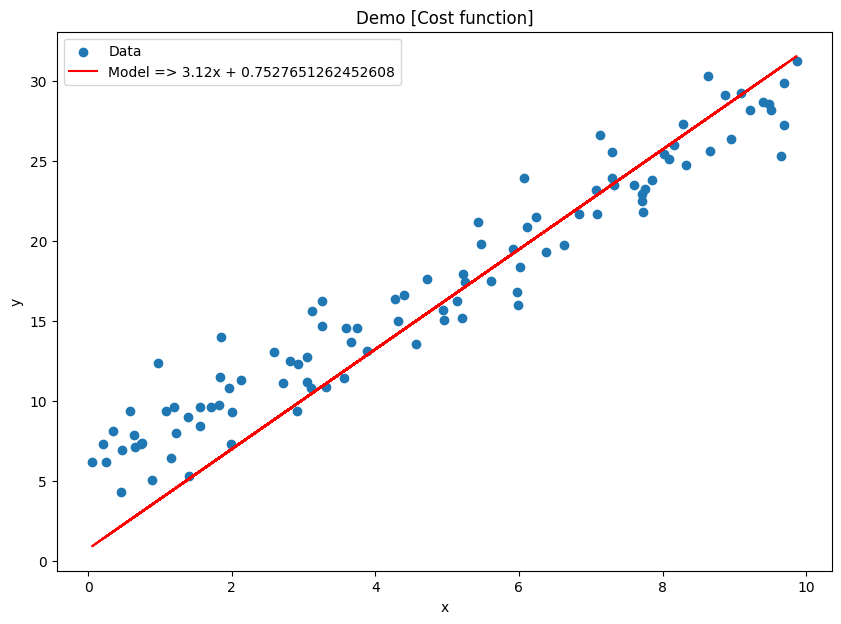

MAE Error: 2.4423689659419345 vs MSE Error: 9.436144861934


In [217]:
test_calculations = calculate_gradient(data=test_data, start_point_a=0, start_point_b=0, learning_rate=0.0001, steps=1000)
plot_the_model(test_calculations[0], test_calculations[1])
mae_error = display_cost_function_mae(data_cost, test_calculations[0], test_calculations[1])
mse_error = display_cost_function(data_cost, test_calculations[0], test_calculations[1])
print(f"MAE Error: {mae_error} vs MSE Error: {mse_error}")

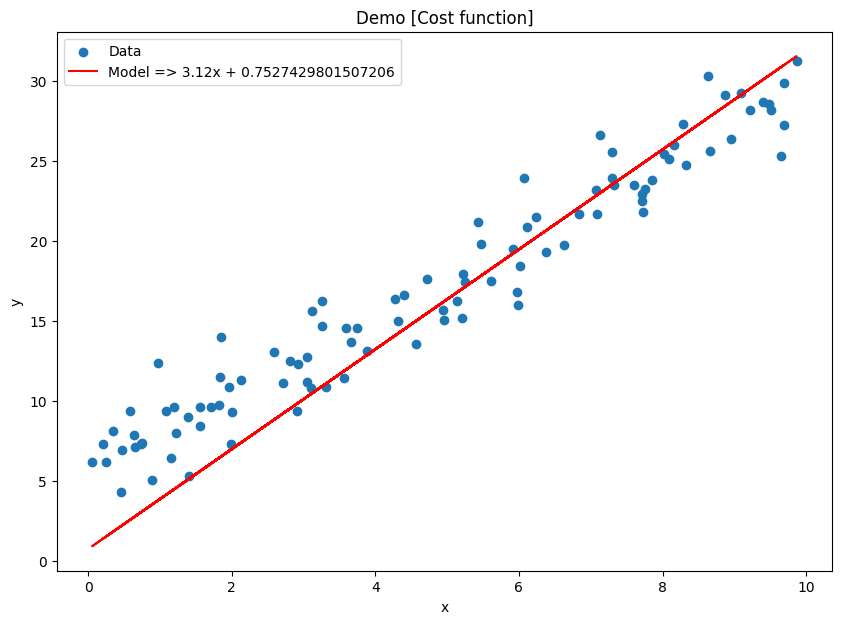

MAE Error: 2.442313325704269 vs MSE Error: 9.436199309997992


In [218]:
test_calculations = calculate_gradient(data=test_data, start_point_a=0, start_point_b=0, learning_rate=0.00001, steps=10000)
plot_the_model(test_calculations[0], test_calculations[1])
mae_error = display_cost_function_mae(data_cost, test_calculations[0], test_calculations[1])
mse_error = display_cost_function(data_cost, test_calculations[0], test_calculations[1])
print(f"MAE Error: {mae_error} vs MSE Error: {mse_error}")

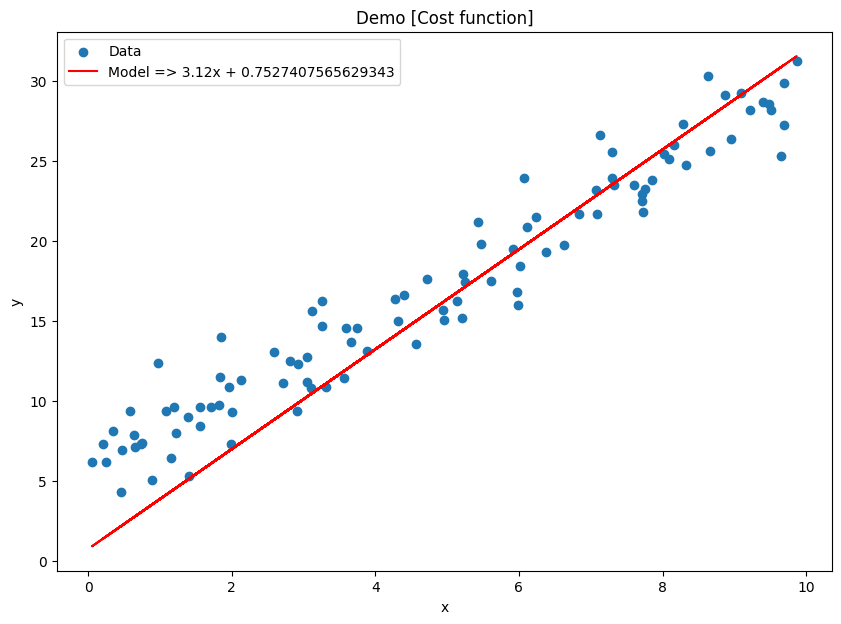

MAE Error: 2.442307728397594 vs MSE Error: 9.436204813354458


In [219]:
test_calculations = calculate_gradient(data=test_data, start_point_a=0, start_point_b=0, learning_rate=0.000001, steps=100000)
plot_the_model(test_calculations[0], test_calculations[1])
mae_error = display_cost_function_mae(data_cost, test_calculations[0], test_calculations[1])
mse_error = display_cost_function(data_cost, test_calculations[0], test_calculations[1])
print(f"MAE Error: {mae_error} vs MSE Error: {mse_error}")

### Analysis of Learning Rate and Steps in Gradient Descent

During testing, we analyzed the effect of varying the `learning_rate` and `steps` on the performance of a linear regression model using **MAE** and **MSE** as evaluation metrics.

#### Observation Table:

| Learning Rate | Steps   | MAE Error | MSE Error |
|---------------|---------|-----------|-----------|
| 0.1           | 1000    | 9.54      | 101.76    |
| 0.01          | 1000    | **1.40**  | **3.23**  |
| 0.001         | 1000    | 2.44      | 9.44      |
| 0.0001        | 1000    | 2.44      | 9.44      |
| 0.00001       | 10000   | 2.44      | 9.44      |
| 0.000001      | 100000  | 2.44      | 9.44      |

#### Key Findings:

- A **very high learning rate** (e.g. `0.1`) causes the model to overshoot the minimum, resulting in **high errors**.
- A **moderate learning rate** (`0.01`) combined with `1000` steps gives the **best results**, balancing convergence speed and accuracy.
- **Very small learning rates** (≤ `0.001`) require significantly **more steps** to converge and may **plateau** before reaching optimal parameters.
- **MAE remains stable** across small learning rates with more steps, but **MSE gives more meaningful feedback** about model fit due to its sensitivity to large errors.

#### Conclusion:

There is a clear relationship between the **learning rate** and the number of **gradient descent steps**. To achieve the best model performance:
- Use a **moderate learning rate** like `0.01`
- Avoid too small or too large values unless steps are adjusted accordingly
- Prefer **MSE** as a cost function when optimizing using gradient descent for better convergence behavior



### Problem 8. Generate some data for classification (1 point)
You'll need to create two clusters of points (one cluster for each class). I recomment using `scikit-learn`'s `make_blobs()` ([info](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)). Use as many features as you used in problem 1.

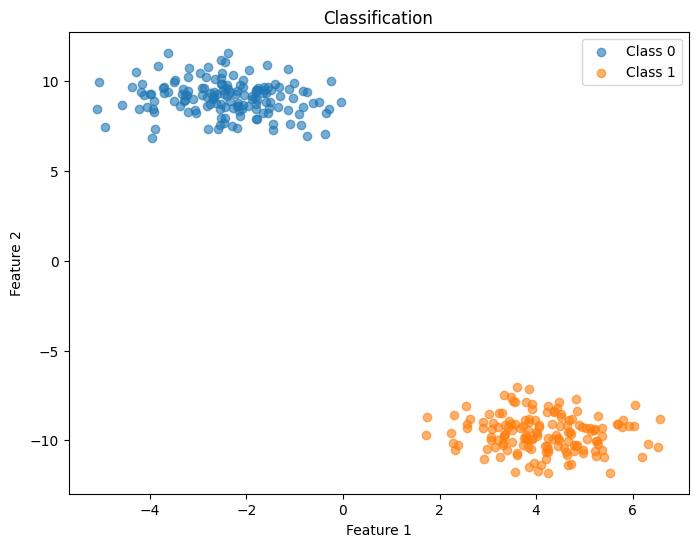

In [220]:
n_features = 9

X, y = make_blobs(n_samples=300, centers=2, n_features=n_features, random_state=42)

if n_features == 9:
    plt.figure(figsize=(8, 6))
    for class_value in [0, 1]:
        plt.scatter(X[y == class_value, 0], X[y == class_value, 1], 
                    label=f"Class {class_value}", alpha=0.6)
    
    plt.title("Classification")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

###### In this visualization, we use only the first two features (`Feature 1` and `Feature 2`) to check whether the data forms distinguishable clusters. This is a quick way to get an initial idea of how well the classes are separated in low-dimensional space. While the actual classification model will use all available features, this 2D visualization can provide useful intuition about the data's structure.


### Problem 9. Perform logistic regression (1 point)
Reuse the code you wrote in problems 3-7 as much as possible. If you wrote vectorized functions with variable parameters - you should find this easy. If not - it's not too late to go back and refactor your code.

The modelling function for logistic regression is
$$ \tilde{y} = \frac{1}{1+\exp{(-\sum_{i=1}^{m}a_i x_i + b)}}$$. Find a way to represent it using as much of your previous code as you can.

The most commonly used loss function is the [cross-entropy](https://en.wikipedia.org/wiki/Cross-entropy).

Experiment with different learning rates, basically repeating what you did in problem 7.

In [230]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def train_logistic_regression(X, y, learning_rate=0.1, epochs=100):
    m, n = X.shape
    W = np.zeros(n)
    b = 0

    for i in range(epochs):
        z = np.dot(X, W) + b
        y_pred = sigmoid(z)

        loss = compute_loss(y, y_pred)

        dz = y_pred - y
        dw = (1 / m) * np.dot(X.T, dz)
        db = (1 / m) * np.sum(dz)

        W -= learning_rate * dw
        b -= learning_rate * db

        if i % 100 == 0:
            print(f"Epoch {i} | Loss: {loss:.4f}")

    return W, b


X, y = make_blobs(n_samples=300, centers=2, n_features=9, random_state=42)
W, b = train_logistic_regression(X, y, learning_rate=0.1, epochs=1000)

Epoch 0 | Loss: 0.6931
Epoch 100 | Loss: 0.0004
Epoch 200 | Loss: 0.0003
Epoch 300 | Loss: 0.0002
Epoch 400 | Loss: 0.0002
Epoch 500 | Loss: 0.0001
Epoch 600 | Loss: 0.0001
Epoch 700 | Loss: 0.0001
Epoch 800 | Loss: 0.0001
Epoch 900 | Loss: 0.0001


### * Problem 10. Continue experimenting and delving deep into ML
You just saw how modelling works and how to implement some code. Some of the things you can think about (and I recommend you pause and ponder on some of them are):
* Code: OOP can be your friend sometimes. `scikit-learn`'s models have `fit()`, `predict()` and `score()` methods.
* Data: What approaches work on non-generated data?
* Evaluation: How well do different models (and their "settings" - hyperparameters) actually work in practice? How do we evaluate a model in a meaningful way?
* Optimization - maths: Look at what `optimizers` (or solvers) are used in `scikit-learn` and why. Many "tricks" revolve around making the algorithm converge (finish) in fewer iterations, or making it more numerically stable.
* Optimization - code: Are there ways to make the code run fastr?

##### Using scikit learn was realy helpful becouse the fit(), predict() methods made the process easier
##### I also saw that evaluating a model with just acuracy is not always the best
##### writting clean code and avoiding loops can help make stuff run faster